# Example of how to load an Allen Database cell into the single cell module
By Gregory Glickert
## First download the cell from Allen Database

In [1]:
import glob
import os

download_from_allen = True
if download_from_allen:
    from allensdk.api.queries.biophysical_api import BiophysicalApi

    bp = BiophysicalApi()
    bp.cache_stimulus = False
    neuronal_model_id = 484635029    
    bp.cache_data(neuronal_model_id)
    
working_dir = os.getcwd()
json_files = glob.glob(os.path.join(working_dir, "*fit*.json"))
swc_files = glob.glob(os.path.join(working_dir, "*.swc"))
dynamic_params = json_files[0]
morphology = swc_files[0]
print(dynamic_params)
print(morphology)

Exception: No data found for neuronal model id 484635029

In [ ]:
# if already compiled then lets delete the folder and force a recompile
if os.path.isdir('x86_64'):
    os.system("rm -rf x86_64")
# compile the mod files
if not os.path.isdir("x86_64"):
    os.system("nrnivmodl modfiles")

/home/gjgpb9/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/CaDynamics.mod
 -> NMODL ../modfiles/Ca_HVA.mod
 -> NMODL ../modfiles/Ca_LVA.mod
 -> NMODL ../modfiles/Ih.mod
 -> NMODL ../modfiles/Im.mod
 -> NMODL ../modfiles/Im_v2.mod
 -> NMODL ../modfiles/Kd.mod
 -> NMODL ../modfiles/K_P.mod
 -> NMODL ../modfiles/K_T.mod
 -> NMODL ../modfiles/Kv2like.mod
 -> NMODL ../modfiles/Kv3_1.mod
 -> NMODL ../modfiles/Nap.mod
 

Translating CaDynamics.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/CaDynamics.c
Translating Ca_HVA.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/Ca_HVA.c
Thread Safe
Thread Safe
Translating Ca_LVA.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/Ca_LVA.c
Thread Safe
Translating Ih.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/Ih.c
Thread Safe
Translating Im.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/Im.c
Translating Im_v2.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/Im_v2.c
Thread Safe
Thread Safe
Translating Kd.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/Kd.c
Thread Safe
Translating K_P.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Allen_tutorial/x86_64/K_P.c
Thread Safe


 -> Compiling Kv3_1.c
 -> Compiling Nap.c
 -> Compiling NaTa.c
 -> Compiling NaTs.c
 -> Compiling SK.c
 -> Compiling NaV.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special


There may be some warnings from the logger that I don't want to see so i will just turn them off. Comment this line out if you want to see the warnings 

In [ ]:
import logging

logging.disable(logging.WARNING)

## Load the Allen Database cell
To use the Allen cell with bmtool we need to use the load_allen_database_cells function. This will load the cell into a format that bmtool can use

In [ ]:
import matplotlib.pyplot as plt
from bmtool.singlecell import CurrentClamp,run_and_plot,Profiler,load_allen_database_cells

cell_creater = load_allen_database_cells(morphology=morphology,
                                 dynamic_params=dynamic_params,
                                 model_processing='aibs_allactive')

--No graphics will be displayed.


Now we can use this cell_creater in a similar way to the cell template name in the Neuron_hoc tutorial.

NEURON mechanisms not found in modfiles.
Injection location: Biophys1[0].soma[0](0.5)
Recording: Biophys1[0].soma[0](0.5)._ref_v
Current clamp simulation running...

Number of spikes: 39



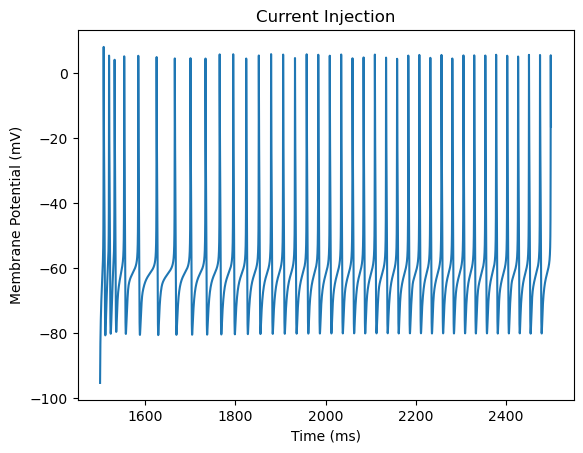

In [ ]:

profiler = Profiler(template_dir='.', mechanism_dir = 'modfiles', dt=0.1)

sim = CurrentClamp(cell_creater, inj_amp=500., inj_delay=1500., inj_dur=1000., tstop=3000., threshold=-15.)

X, Y = run_and_plot(sim, title='Current Injection', xlabel='Time (ms)',
                    ylabel='Membrane Potential (mV)', plot_injection_only=True)
plt.show()

Injection location: Biophys1[21].soma[0](0.5)
Recording: Biophys1[21].soma[0](0.5)._ref_v
Running simulations for FI curve...

Results
    Injection (nA):  number of spikes
0              0.00                 0
1              0.05                 0
2              0.10                 0
3              0.15                 0
4              0.20                 0
5              0.25                 0
6              0.30                 0
7              0.35                 8
8              0.40                14
9              0.45                24
10             0.50                41
11             0.55                61
12             0.60                75
13             0.65                84
14             0.70                 3
15             0.75                 2
16             0.80                 2
17             0.85                 2
18             0.90                 2
19             0.95                 2
20             1.00                 1



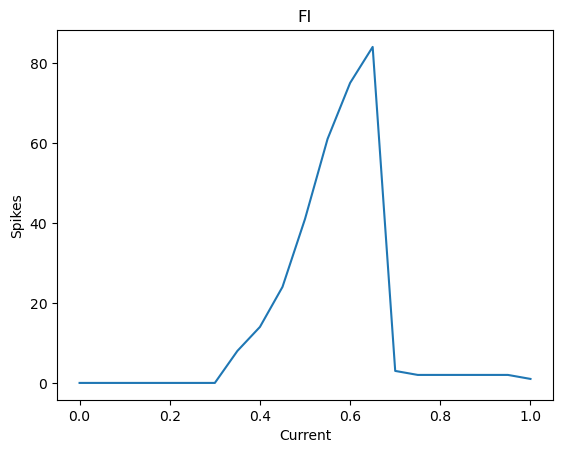

In [ ]:
from bmtool.singlecell import FI

sim = FI(cell_creater,tdur=1000,i_increment=50)
X, Y = run_and_plot(sim,xlabel='Current',ylabel="Spikes")
plt.show()